<a href="https://colab.research.google.com/github/Kaif10/Twiteer_disaster-Tweets-Analysis/blob/master/disaster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
!pip install -q kaggle

In [2]:
upload = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 65.6MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 47.7MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.2MB/s]


In [5]:
#specifying the paths in colab
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com\
    -O /tmp/train.csv

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com \
    -O /tmp/test.csv

import os
import zipfile



--2020-05-11 14:23:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12202 (12K) [application/xml]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]  11.92K  --.-KB/s    in 0s      

2020-05-11 14:23:56 (55.7 MB/s) - ‘/tmp/train.csv’ saved [12202/12202]

--2020-05-11 14:23:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c16::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12202 (12K) [application/xml]
Saving to: ‘/tmp/test.csv’

/tmp/test.csv       100%[===================>]

In [0]:
#import necessary modules
import json
import tensorflow as tf
import csv
import keras
import pandas as pd
import random
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 




In [0]:
# read files using pandas
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [0]:
train_df.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [0]:
test_df.head(15)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [9]:
#counting no of empty values in keywords
print(train_df.keyword.isna().sum())
print(test_df.keyword.isna().sum())

61
26


In [0]:
# func to return max length word from a sentence
def func(string):
    list = string.split(' ')
    return max(list, key = len)
  


In [0]:
empty_index = train_df.loc[pd.isna(train_df["keyword"]), :].index

In [15]:
for i in range(len(train_df.keyword)):
  if i in empty_index:
    train_df.keyword[i] = func(train_df.text[i])
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# No empty values left in keyword column
train_df.keyword.isna().sum()

0

In [17]:
# New dataframe with no empy keyword values
train_df

,id,keyword,location,text,target
0,1,#earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,#wildfires,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,#wildfires,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,http://t.co/STfMbbZFB5,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,http://t.co/zDtoyd8EbJ,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,investigating,NaN,Police investigating after an e-bike collided ...,1


In [0]:
import time

# Text Processing Libraries
import spacy
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text.lower()
train_df['text_clean'] = train_df['text_clean'].apply(lambda x: clean_text(x))


In [53]:
#removing the unnecessary stopwords
!pip install nlppreprocess
from nlppreprocess import NLP

nlp = NLP()

train_df['text_clean'] = train_df['text'].apply(nlp.process)
test_df['text_clean'] = test_df['text'].apply(nlp.process)  

In [0]:
#lemmatizing text which means words like go, going, gone,etc converts into go. Because tense doesn't matter much in the current dataset we are analysing.
# Import spaCy's language model
en_model = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in en_model(i)]
        output.append(' '.join(s))
    return output

In [0]:
train_df['text_clean'] = lemmatization(train_df['text_clean'])
test_df['text_clean'] = lemmatization(test_df['text_clean'])

In [0]:
embedding_dim = 100
max_length = 146
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"



In [0]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
sentences=[]
labels=[]

for i in range(len(train_df.target)):
    sentences.append(train_df['text_clean'][i])
    labels.append(train_df.target[i])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)




training_sequences = padded[0:len(train_df['text_clean'])]
training_labels = labels[0:len(train_df.target)]


In [39]:
# input length is 146 for the first layer of neural net beacuse the max length of sentence in text column is  146
training_sequences[71].shape

(146,)

In [40]:
#Neural Network consist of embedding layer and the GlobalAveragePooling1D which flattens the previous layer. You can also use the flatten layer.
num_epochs = 30
model = Sequential()

model.add(Embedding(vocab_size+1, 100, input_length=146))

model.add(GlobalAveragePooling1D())
model.add(Dense(vocab_size+1/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))


# Compile model learning rate=0.1
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.1), metrics=['accuracy'])
             

model.summary()

num_epochs = 30
history = model.fit(training_sequences, np.array(labels), epochs=num_epochs,  verbose=2)

print("Training Complete")
#training accuracy of almost 97%.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 146, 100)          1507900   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 15078)             1522878   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15079     
Total params: 3,045,857
Trainable params: 3,045,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
238/238 - 10s - loss: 4.6917 - accuracy: 0.5644
Epoch 2/30
238/238 - 10s - loss: 0.5149 - accuracy: 0.7881
Epoch 3/30
238/238 - 10s - loss: 0.3219 - accuracy: 0.8981
Epoch 4/30
238/238 - 10s - loss: 0.2482 - accuracy: 0.9304
Epoch 5/

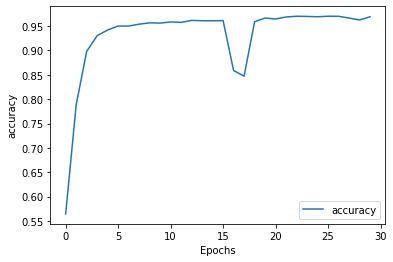

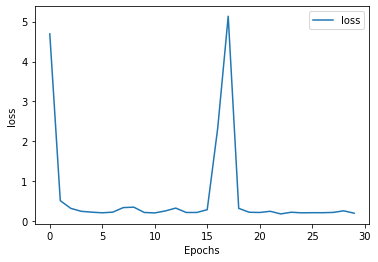

In [116]:
#we don't have vaidation set here so only train set accuracy and loss
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
# that one big spike in the middle of both the graphs should be avoided

In [109]:
# Lets test the Neural Network on some sentences from test data
textt = [test_df.text_clean[3], test_df.text_clean[26], test_df.text_clean[48], test_df.text_clean[97]]
#Some of the sentences from  test['text'] column
print(test_df.text[3])
print(test_df.text[26])
print(test_df.text[48])
print(test_df.text[97])

Apocalypse lighting. #Spokane #wildfires
#nowplaying Alfons - Ablaze 2015 on Puls Radio #pulsradio http://t.co/aA5BJgWfDv
'When the aftershock happened (Nepal) we were the last int'l team still there; in a way we were 1st responders.' Chief Collins @LACo_FD
@thehill this is 1 example of y the Conservatives annihilated Burton v Wiimington Prkng Auth while Liberals stood by &amp;have done nothing


In [111]:
sequenc = tokenizer.texts_to_sequences(textt)
padded = pad_sequences(sequenc, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[0.99969554]
 [0.03565655]
 [0.90710187]
 [0.31944105]]


In [0]:
# Not bad ha. We can say our model did good.It predicts most of our test data correctly. One thing I didn't do is use the keywords column or the combination of 
#train_df.text + train_df.keyword which i created
# earlier in this code.You can also try taining your neural network with  train_df['keyword_clean'], train_df['label'] or train_df['combine'], train_df['label']
# check if you can get a better accuracy than this.